In [1]:
%load_ext lab_black
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# load mortality rate data

fl_pre_policy_mortality = pd.read_csv(
    "./fl_pre_policy_mortality.csv", sep=",", index_col=0
)
fl_post_policy_mortality = pd.read_csv(
    "./fl_post_policy_mortality.csv", sep=",", index_col=0
)
tx_pre_policy_mortality = pd.read_csv(
    "./tx_pre_policy_mortality.csv", sep=",", index_col=0
)
tx_post_policy_mortality = pd.read_csv(
    "./tx_post_policy_mortality.csv", sep=",", index_col=0
)
wa_pre_policy_mortality = pd.read_csv(
    "./wa_pre_policy_mortality.csv", sep=",", index_col=0
)
wa_post_policy_mortality = pd.read_csv(
    "./wa_post_policy_mortality.csv", sep=",", index_col=0
)

In [3]:
# concatenate pre and post mortality rate data

fl_mortality = pd.concat([fl_pre_policy_mortality, fl_post_policy_mortality])
tx_mortality = pd.concat([tx_pre_policy_mortality, tx_post_policy_mortality])
wa_mortality = pd.concat([wa_pre_policy_mortality, wa_post_policy_mortality])

In [4]:
fl_mortality.head()

,Year,State,County,Deaths,Population,Mortality Rate
0,2003,FL,Alachua County,11.0,227022.0,0.000048
1,2003,FL,Bay County,21.0,155044.0,0.000135
2,2003,FL,Brevard County,97.0,504847.0,0.000192
3,2003,FL,Broward County,230.0,1707543.0,0.000135
4,2003,FL,Citrus County,16.0,126215.0,0.000127


In [5]:
# # subset to dataframes with averaged mortality rate by year for each state

# fl_mortality_avg = fl_mortality.groupby(["Year"], as_index=False)[
#     "Mortality Rate"
# ].mean()
# tx_mortality_avg = tx_mortality.groupby(["Year"], as_index=False)[
#     "Mortality Rate"
# ].mean()
# wa_mortality_avg = wa_mortality.groupby(["Year"], as_index=False)[
#     "Mortality Rate"
# ].mean()

### Plot Pre-Post Policy for Florida, Texas, and Washington

#### Florida

In [6]:
# seperate to pre and post policy periods for FL

x_pre = np.array(fl_mortality[fl_mortality["Year"] < 2010]["Year"])
y_pre = np.array(fl_mortality[fl_mortality["Year"] < 2010]["Mortality Rate"])

x_post = np.array(fl_mortality[fl_mortality["Year"] >= 2010]["Year"])
y_post = np.array(fl_mortality[fl_mortality["Year"] >= 2010]["Mortality Rate"])

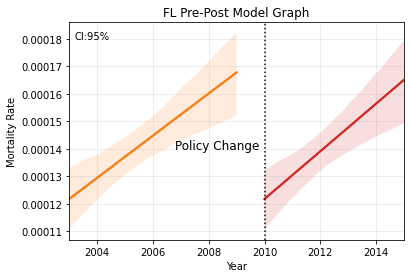

In [7]:
# plot the figure
import warnings

warnings.filterwarnings("ignore")

# fig, ax = plt.subplots()

# ax.plot(x_pre, y_pre, "o")
m, b = np.polyfit(x_pre, y_pre, 1)
plt.plot(x_pre, m * x_pre + b)
ax = sns.regplot(x_pre, y_pre, ci=95, scatter=False)

# ax.plot(x_post, y_post, "o")
m, b = np.polyfit(x_post, y_post, 1)
plt.plot(x_post, m * x_post + b)
ax = sns.regplot(x_post, y_post, ci=95, scatter=False)

plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("FL Pre-Post Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.text(2006.8, 0.00014, "Policy Change", fontsize=12)
plt.text(2003.2, 0.00018, "CI:95%", fontsize=10)
plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

plt.show()

#### Texas

In [8]:
# seperate to pre and post policy periods for TX

x_pre_tx = np.array(tx_mortality[tx_mortality["Year"] < 2007]["Year"])
y_pre_tx = np.array(tx_mortality[tx_mortality["Year"] < 2007]["Mortality Rate"])

x_post_tx = np.array(tx_mortality[tx_mortality["Year"] >= 2007]["Year"])
y_post_tx = np.array(tx_mortality[tx_mortality["Year"] >= 2007]["Mortality Rate"])

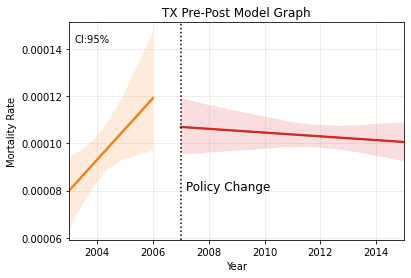

In [9]:
# plot the figure
import warnings

warnings.filterwarnings("ignore")

# fig, ax = plt.subplots()

# ax.plot(x_pre_tx, y_pre_tx, "o")
m, b = np.polyfit(x_pre_tx, y_pre_tx, 1)
plt.plot(x_pre_tx, m * x_pre_tx + b)
ax = sns.regplot(x_pre_tx, y_pre_tx, ci=95, scatter=False)

# ax.plot(x_post_tx, y_post_tx, "o")
m, b = np.polyfit(x_post_tx, y_post_tx, 1)
plt.plot(x_post_tx, m * x_post_tx + b)
ax = sns.regplot(x_post_tx, y_post_tx, ci=95, scatter=False)

plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("TX Pre-Post Model Graph")
plt.axvline(x=2007, color="black", ls=":")
plt.text(2007.2, 0.00008, "Policy Change", fontsize=12)
plt.text(2003.2, 0.000143, "CI:95%", fontsize=10)
plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

plt.show()

#### Washington

In [10]:
# seperate to pre and post policy periods for WA

x_pre_wa = np.array(wa_mortality[wa_mortality["Year"] < 2012]["Year"])
y_pre_wa = np.array(wa_mortality[wa_mortality["Year"] < 2012]["Mortality Rate"])

x_post_wa = np.array(wa_mortality[wa_mortality["Year"] >= 2012]["Year"])
y_post_wa = np.array(wa_mortality[wa_mortality["Year"] >= 2012]["Mortality Rate"])

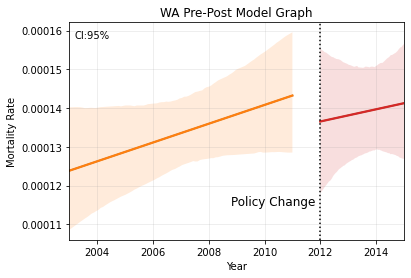

In [11]:
# plot the figure
import warnings

warnings.filterwarnings("ignore")

# fig, ax = plt.subplots()

# ax.plot(x_pre_wa, y_pre_wa, "o")
m, b = np.polyfit(x_pre_wa, y_pre_wa, 1)
plt.plot(x_pre_wa, m * x_pre_wa + b)
ax = sns.regplot(x_pre_wa, y_pre_wa, ci=95, scatter=False)

# ax.plot(x_post_wa, y_post_wa, "o")
m, b = np.polyfit(x_post_wa, y_post_wa, 1)
plt.plot(x_post_wa, m * x_post_wa + b)
ax = sns.regplot(x_post_wa, y_post_wa, ci=95, scatter=False)

plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("WA Pre-Post Model Graph")
plt.axvline(x=2012, color="black", ls=":")
plt.text(2008.8, 0.000115, "Policy Change", fontsize=12)
plt.text(2003.2, 0.000158, "CI:95%", fontsize=10)
plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

plt.show()